##Logestic Regression

We need to find the sigmoid function to fit the data so we try to train the model with thetas is 0 then  we use the scipy gradient descent to find the values of the thetas which give as an small cost after we use the gradient descent we get accuracy 89% where the sigmoid is so close to real y value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=pd.read_csv("/content/Data_for_LogReg.txt",names=["Exam1","Exam2","Admitted"],header=None)
print(data.head())
print(data.describe())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
            Exam1       Exam2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [3]:
Admitted=data[data['Admitted'].isin([1])]
unAdmitted=data[data['Admitted'].isin([0])]


Text(0, 0.5, 'Exam 2 Score')

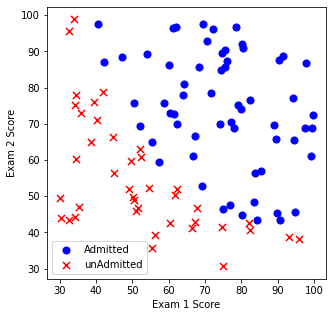

In [4]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(Admitted["Exam1"],Admitted["Exam2"],s=50, c='b', marker='o', label='Admitted')
ax.scatter(unAdmitted["Exam1"],unAdmitted["Exam2"],s=50, c='r', marker='x', label='unAdmitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


In [5]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [6]:
def cost(theta,x,y):
  theta=np.matrix(theta)
  x=np.matrix(x)
  y=np.matrix(y)
  f=np.multiply((-y),np.log(sigmoid(x*theta.T)))
  s=np.multiply((1-y),np.log(1-sigmoid(x*theta.T)))
  return (1/len(x))*np.sum(f-s)


In [7]:
data.insert(0,"ones",1)

In [8]:
data.head()

,ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [43]:
cols=data.shape[1]
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:]
print("x:\n")
print(x)
print("Y:\n")
print(y)




x:

    ones      Exam1      Exam2
0      1  34.623660  78.024693
1      1  30.286711  43.894998
2      1  35.847409  72.902198
3      1  60.182599  86.308552
4      1  79.032736  75.344376
..   ...        ...        ...
95     1  83.489163  48.380286
96     1  42.261701  87.103851
97     1  99.315009  68.775409
98     1  55.340018  64.931938
99     1  74.775893  89.529813

[100 rows x 3 columns]
Y:

    Admitted
0          0
1          0
2          0
3          1
4          1
..       ...
95         1
96         1
97         1
98         1
99         1

[100 rows x 1 columns]


In [10]:
x=np.array(x.values)
y=np.array(y.values)
theta=np.zeros(3)
print(theta)

[0. 0. 0.]


In [11]:
print(cost(theta,x,y))

0.6931471805599453


In [15]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad


In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))


In [17]:
print(result)

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)


In [18]:
print(cost(result[0],x,y))

0.20349770158947447


In [19]:
def perdict(theta,x):
  pr=sigmoid(x*theta.T)
  return[1 if i>=0.5 else 0 for i in pr]

In [20]:
new_theta=result[0]
new_theta=np.matrix(new_theta)
predaction=perdict(new_theta,x)
acc=[1 if(a==b==1) or (a==b==0) else 0 for(a,b) in zip(predaction,y)]
acc=sum(map(int, acc))/len(acc)
print(f"The Accuracy of the model is:{acc*100}%")

The Accuracy of the model is:89.0%
